In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from keras.preprocessing.image import ImageDataGenerator, load_img

In [0]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [0]:
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f03c1db8b38> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1db8ba8> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1db8e48> False
<keras.layers.pooling.MaxPooling2D object at 0x7f03c1db8d30> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1d592e8> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1d59e48> False
<keras.layers.pooling.MaxPooling2D object at 0x7f03c1d5b9e8> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1d5b828> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1d5f518> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1d5fe10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f03c1d67b38> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1d67978> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1d6c668> False
<keras.layers.convolutional.Conv2D object at 0x7f03c1d6ce10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f03c1d72c88>

In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [0]:
model = models.Sequential()

In [0]:
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 2052      
Total params: 40,932,676
Trainable params: 33,297,412
Non-trainable params: 7,635,264
__________________________________

In [0]:
train_dir = '/content/drive/My Drive/data/train'
validation_dir = '/content/drive/My Drive/data/Test'

In [0]:
import numpy as np
from random import shuffle

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
       rotation_range=20,
       width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 62
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

Found 1305 images belonging to 4 classes.
Found 188 images belonging to 4 classes.


In [0]:
print (train_generator.class_indices)

{'Inorganic': 0, 'Organic High': 1, 'Organic Low': 2, 'Organic Medium': 3}


In [24]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/21 [>.............................] - ETA: 32:15 - loss: 1.7624 - acc: 0.2903

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/21 [=>............................] - ETA: 28:14 - loss: 2.5221 - acc: 0.3145

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/21 [===>..........................] - ETA: 26:08 - loss: 2.2853 - acc: 0.2742

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/21 [====>.........................] - ETA: 24:14 - loss: 2.1211 - acc: 0.2621

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/21 [======>.......................] - ETA: 22:26 - loss: 1.9901 - acc: 0.2806

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/21 [=======>......................] - ETA: 21:31 - loss: 1.8949 - acc: 0.2742

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/21 [========>.....................] - ETA: 19:45 - loss: 1.8405 - acc: 0.2719

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/21 [===========>..................] - ETA: 15:12 - loss: 1.7294 - acc: 0.2806

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/21 [=============>................] - ETA: 14:12 - loss: 1.7036 - acc: 0.2816

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/21 [==============>...............] - ETA: 13:18 - loss: 1.6773 - acc: 0.2889

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/21 [================>.............] - ETA: 12:03 - loss: 1.6548 - acc: 0.2891

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/21 [=================>............] - ETA: 10:47 - loss: 1.6396 - acc: 0.2825

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/21 [==================>...........] - ETA: 9:22 - loss: 1.6174 - acc: 0.2855 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/21 [====================>.........] - ETA: 8:04 - loss: 1.5981 - acc: 0.2905

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/21 [=====================>........] - ETA: 6:45 - loss: 1.5879 - acc: 0.2915

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/21 [=======================>......] - ETA: 5:23 - loss: 1.5790 - acc: 0.2955

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/21 [========================>.....] - ETA: 4:03 - loss: 1.5688 - acc: 0.2952

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/21 [==========================>...] - ETA: 2:44 - loss: 1.5508 - acc: 0.3056

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/21 [===========================>..] - ETA: 1:24 - loss: 1.5334 - acc: 0.3150

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/21 [============================>.] - ETA: 3s - loss: 1.5158 - acc: 0.3226  

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/21 [===============================] - 1903s 86s/step - loss: 1.5023 - acc: 0.3241 - val_loss: 1.0434 - val_acc: 0.6383
Epoch 2/30
22/21 [===============================] - 612s 28s/step - loss: 1.1435 - acc: 0.4529 - val_loss: 1.7414 - val_acc: 0.3830
Epoch 3/30
22/21 [===============================] - 715s 33s/step - loss: 0.9536 - acc: 0.6000 - val_loss: 1.0475 - val_acc: 0.5213
Epoch 4/30
22/21 [===============================] - 765s 35s/step - loss: 0.8848 - acc: 0.6215 - val_loss: 1.2278 - val_acc: 0.5372
Epoch 5/30
22/21 [===============================] - 731s 33s/step - loss: 0.8172 - acc: 0.6628 - val_loss: 3.6541 - val_acc: 0.5319
Epoch 6/30
22/21 [===============================] - 632s 29s/step - loss: 0.7552 - acc: 0.6989 - val_loss: 2.0876 - val_acc: 0.5106
Epoch 7/30
22/21 [===============================] - 682s 31s/step - loss: 0.7473 - acc: 0.7042 - val_loss: 1.4736 - val_acc: 0.5532
Epoch 8/30
22/21 [===============================] - 698s 32s/step - loss: 0.65

In [25]:
#Save model to json
import os
model.save_weights("vggo.h5")
print("model saved to disk....")

model saved to disk....


In [0]:
##Prediction Part
import numpy as np
from keras.preprocessing import image

In [0]:
img_pred = image.load_img('/content/drive/My Drive/data/train/Organic High/orghigh1(100).jpg', target_size = (224, 224))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)

In [0]:
model.load_weights('vggo.h5')

In [0]:
class_names = {0: 'Inorganic', 1: 'organicHigh' , 2:'OrganicMedium' , 3:'OrganicLow'}

ERROR! Session/line number was not unique in database. History logging moved to new session 62


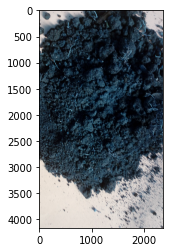

In [30]:
for img in os.listdir("/content/drive/My Drive/data/train"):
    import cv2
    img3 = cv2.imread('/content/drive/My Drive/data/train/Organic High/orghigh1(100).jpg')  
    plt.imshow(img3)

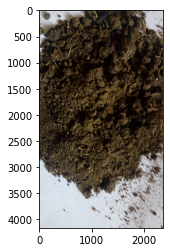

In [31]:
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

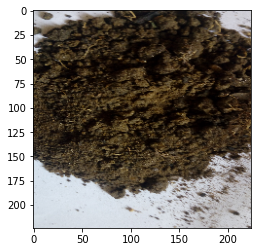

In [32]:
img3 = cv2.resize(img3,(224,224))
plt.imshow(img3)

In [0]:
img4 = np.reshape(img3,[1,224,224,3])

In [34]:
out = model.predict(img4) 
print (np.argmax(out))
print(class_names[np.argmax(out)])

1
organicHigh
